## Final Project Submission

Please fill out:
* Student name: Marvin Mills
* Student pace: part time
* Scheduled project review date/time: End of October
* Instructor name: Yish Lim
* Blog post URL:


In [3]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

house_data = pd.read_csv('kc_house_data.csv')

In [38]:
#house_data

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Note Stop:
--

Some interesting insights about an "average" home, from the initial look at the aggregate statistics.
According to the data, the "average" home:

- has 3 bed / 2.25 baths
- has a living space that is 25% of its lot size
- doesn't have a basement
- was built in 1975
- hasn't been renovated
- sold for $450,000 USD

With these things in mind, I may explore the following questions a bit more:

- how would a "living space ratio" feature fare as a predictor?
- what's the "bathroom effect"?
- what's the impact of the "age" of a home on its price?

In [9]:
# Checking for null entries
house_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note Stop:
--

Since the mean value for each variable that has null values is 0, I'll set all of the NaN's to 0 here.

In [11]:
# Changing NaNs to 0's

house_data = house_data.fillna(0)
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [14]:
# For loop to sift through the unique values of select column, to get a better sense of the data.
# If unable to do this, then it quite possibly means the column's data has multiple datatypes.
# Also, this is a way to determine initially whether a variable is categorical, as well as check for NaN's.

def siftr(x):
    
    view_deets = house_data[x]
    storage = []

    for i in view_deets:
        if i in storage:
            continue
        elif i >= 0:
            storage.append(i)

    print(sorted(storage))


In [35]:
# Changed a few column names so they better reflected what the data represents
# Also replace the ? in 'sqft_basement' with the mean value
house_data = house_data.rename(columns={"view":"times_viewed","waterfront":"has_waterfront"})
house_data['sqft_basement'] = house_data['sqft_basement'].replace('?',0.0)

# Changing datatype to int
house_data['sqft_basement'] = house_data['sqft_basement'].astype(str).astype(float).astype(int)


#print(house_data.head())
#print(siftr('sqft_basement'))

In [37]:
#house_data.dtypes

---

BUSINESS CASE / PROBLEM:
--

In the decentralized finance world, fractional investment in tokenized real estate assets is in its infancy, but there is potential for this to transform the way we buy, sell and leverage real estate in the future. Homeowners are able to put up their homes as collateral by tokenizing the property and then receiving a loan, paid in the form of cryptocurrency up to a set amount, in relation to the housing price (better known as, LTV). Moreover, those interested in investing can purchase "parts" of a property, or "fractions," in much the same way crowdfund real estate works. Collective owners of a property can also decide whether to make upgrades or sell the property. <b>By allowing initial homeowners to take out a loan on their homes while also availing their asset to be invested in, there arises a need to have an accurate price forecast for home values before investment, and before taking a vote on which upgrades to do.</b> Having accurate house price predictions ensures that home owners who have taken out loans on their property properly collateralize their asset, so as to avoid a market fluctuation causing a liquidation event to occur and the owner potentially losing their real estate asset. As it relates to home upgrades, due to the highly diverse nature of the USA real estate market, blanket upgrade approaches are not sufficient. <b>Investors need a way to accurately predict after repair value of homes, with respect to region, especially because a significant amount of investors are outside of the USA.</b>

---

In [58]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,times_viewed,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


The Case for Dropping Certain Variables:
-- 

- "ID" will be removed because it isn't being factored into the modeling.
- Because 'date' relates to Sale Date, it won't help much with modeling, as it isn't a continuous variable
- Lat and Long columns can be dropped as having Zipcode is sufficient for incorporating "location" into the model.

In [62]:
# Dropping the columns as mentioned
#house_data = house_data.drop(['id','date','lat','long'], axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,times_viewed,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,1800,7503


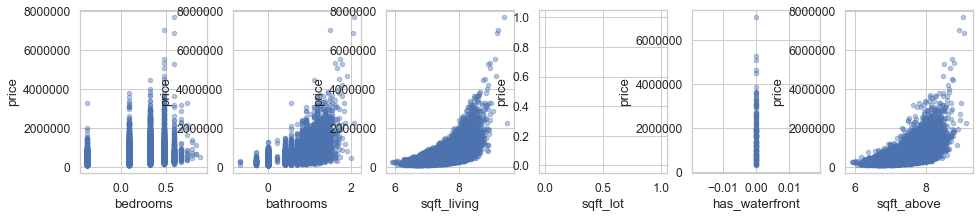

In [131]:
# Checking on whether variables might be categorical

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','has_waterfront','sqft_above'], axes):
    house_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

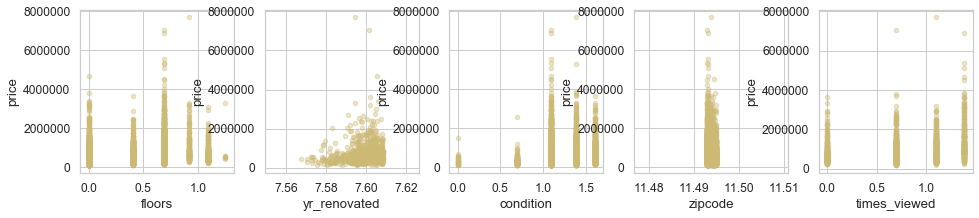

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['floors', 'yr_renovated', 'condition', 'zipcode','times_viewed'], axes):
    house_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='y')

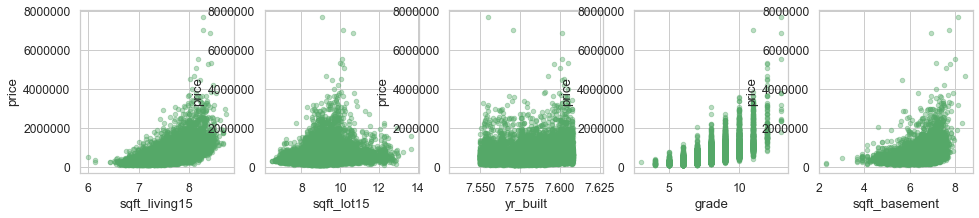

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['sqft_living15', 'sqft_lot15', 'yr_built', 'grade','sqft_basement'], axes):
    house_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='g')

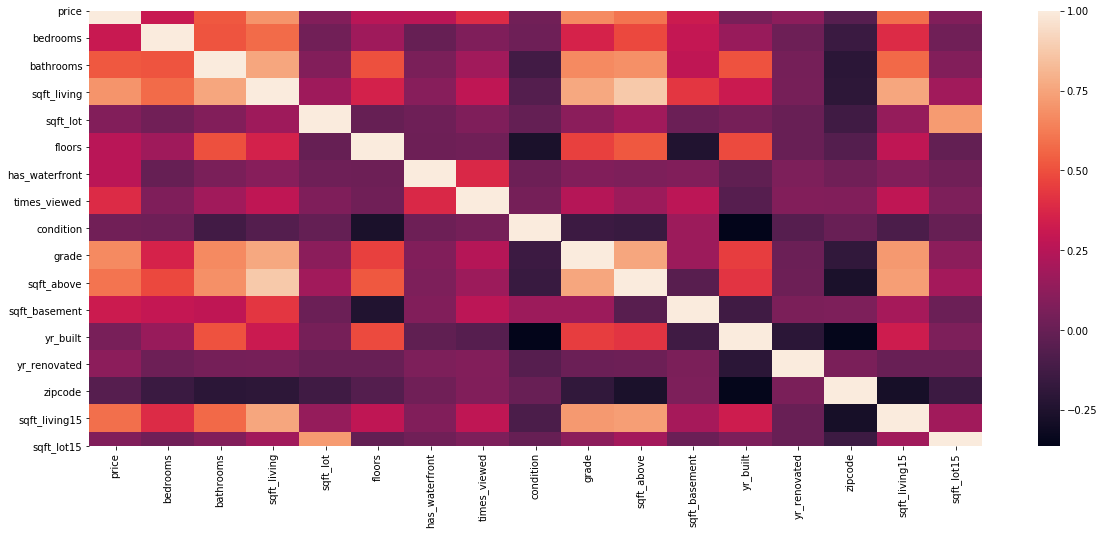

In [63]:
# Heatmap to check correlation of variables one to another.

f, ax = plt.subplots(figsize=(20, 8))
corr = house_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Note Stop:
--

Here are some features I may want to transform or add:

- a living-lot ratio
- from times_viewed to "has_been_viewed"
- go from yr_built to "age" of the home
- condition and grade would be better with adjustments of some kind
- perhaps change sqft_basement to "has_basement" categorical
- perhaps change yr_renovated to "been_renovated" categorical
- floors & has_waterfront both changed to categoricals as well perhaps
- <b>may make sense to drop either "sqft_living" or "sqft_above" as they appear to have strong correlation with each other</b>

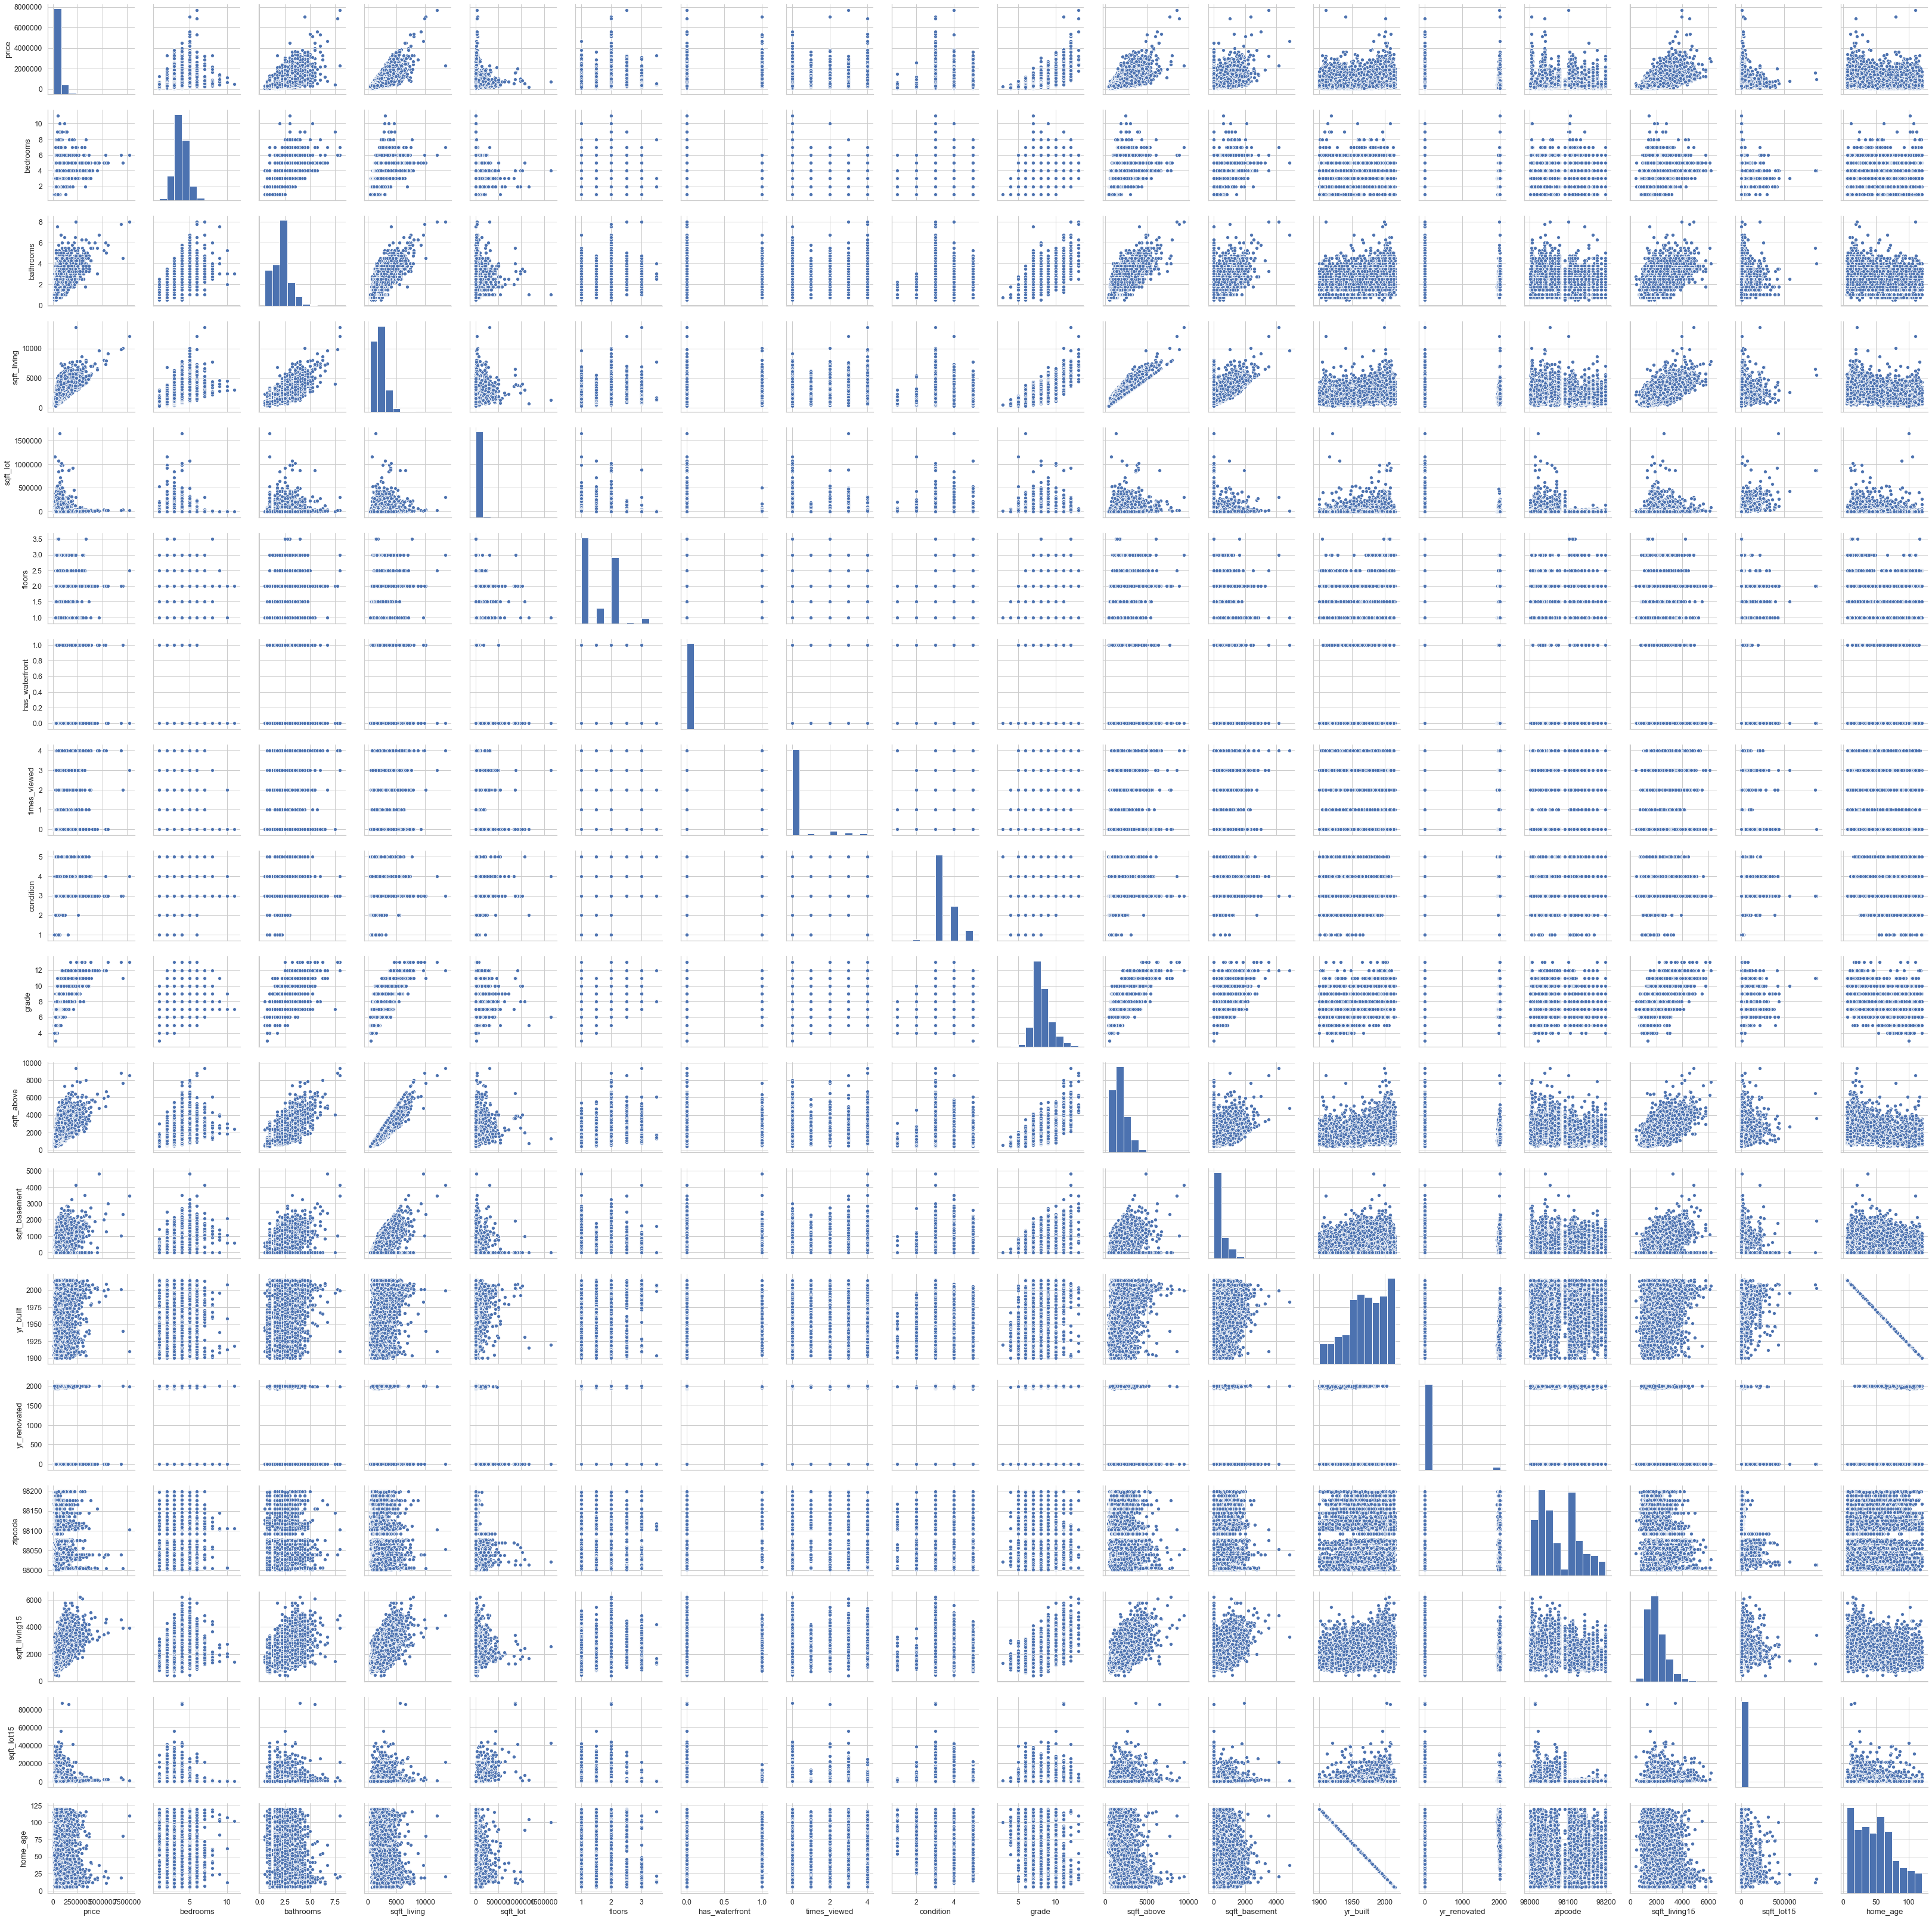

In [106]:
# Checking on the correlation for variables between themselves and the target variable.
sns.pairplot(house_data)

Note Stop:
--

After reviewing this pairplot, the correlations between the variables and themselves as well as between independent variables and the target variable, the details line up with the heatmap.

Bathrooms, Square Foot Living (15), Square Foot Above are the ones with the strongest correlation to Price.

The most normal histogram distributions:

- sqft_living15
- sqft_above
- grade
- bathrooms
- (to a lesser degree) sqft_living

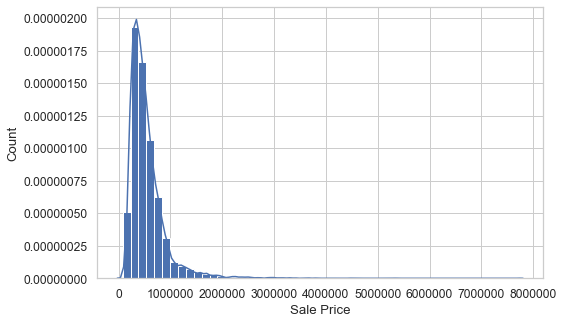

In [130]:
#Checking out the dependent variable which is the focus of the model.

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    house_data['price'], norm_hist=True, kde=True, bins=50, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

In [73]:
# Checking on correlation between two variables using Pearson's
list1 = house_data['sqft_living']
list2 = house_data['bathrooms']

corr, _ = pearsonr(list1,list2)
corr

0.7557576009502522

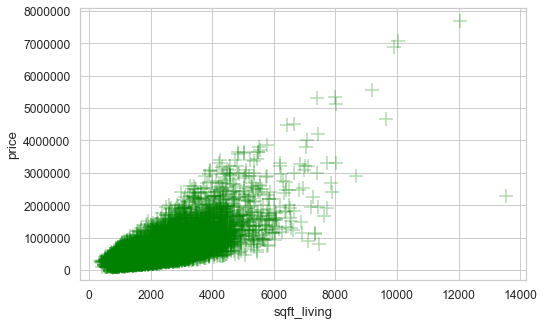

In [107]:
# The scatterplot showing the correlation between the single variable and target variable.

sns.regplot(x=house_data["sqft_living"], y=house_data["price"], marker="+", fit_reg=False, scatter_kws={"color":"green","alpha":0.3,"s":200})

In [81]:
# Finding the index for the home with 33 bedrooms.
house_data['bedrooms'].sort_values().tail()

15147    10
13301    10
19239    10
8748     11
15856    33
Name: bedrooms, dtype: int64

In [83]:
house_data.iloc[15856]

price             640000.00
bedrooms              33.00
bathrooms              1.75
sqft_living         1620.00
sqft_lot            6000.00
floors                 1.00
has_waterfront         0.00
times_viewed           0.00
condition              5.00
grade                  7.00
sqft_above          1040.00
sqft_basement        580.00
yr_built            1947.00
yr_renovated           0.00
zipcode            98103.00
sqft_living15       1330.00
sqft_lot15          4700.00
Name: 15856, dtype: float64

In [84]:
house_data['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [89]:
# Replacing the 33-bedroom outlier with the bedrooms mean of 3.

house_data.iloc[15856,1] = 3
house_data.iloc[15856,1]

3

In [90]:
# checking the bedrooms column to verify 
house_data['bedrooms'].sort_values().tail()

4092      9
13301    10
15147    10
19239    10
8748     11
Name: bedrooms, dtype: int64

In [93]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
has_waterfront    21597 non-null float64
times_viewed      21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null int32
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
dtypes: float64(6), int32(1), int64(10)
memory usage: 2.7 MB


In [95]:
# Importing today's date

from datetime import date

today = date.today()
yr_now = int(today.strftime("%Y"))
yr_now

2020

In [105]:
# Creating the "Age" of the home variable

house_data['home_age'] = [(yr_now - i) for i in house_data['yr_built']]
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,times_viewed,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,home_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,1340,5650,65
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,1690,7639,69
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,2720,8062,87
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,1360,5000,55
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,1800,7503,33


bedrooms


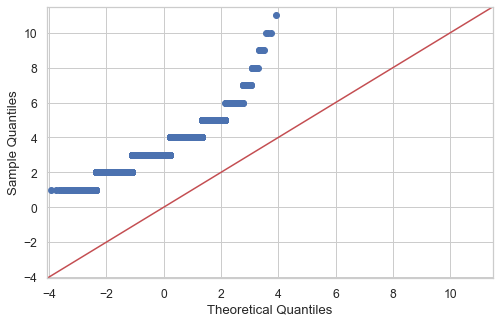

bathrooms


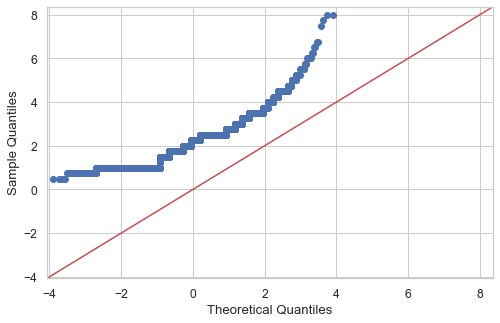

sqft_living


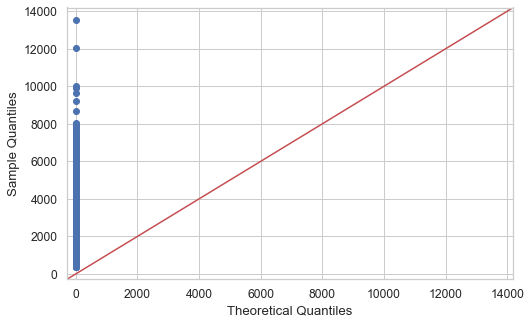

sqft_lot


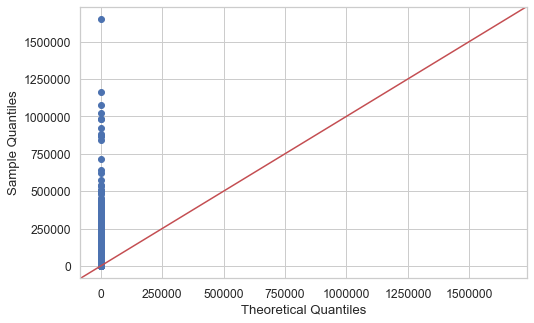

floors


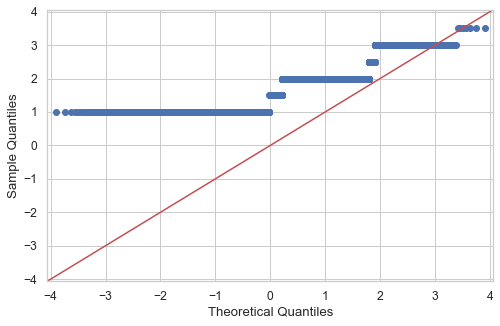

has_waterfront


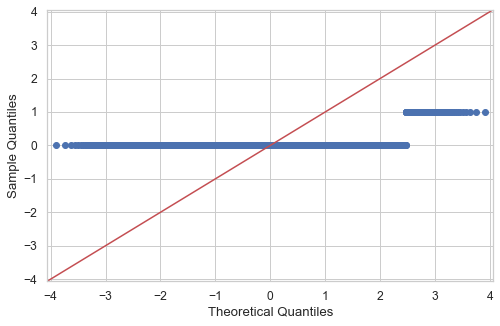

times_viewed


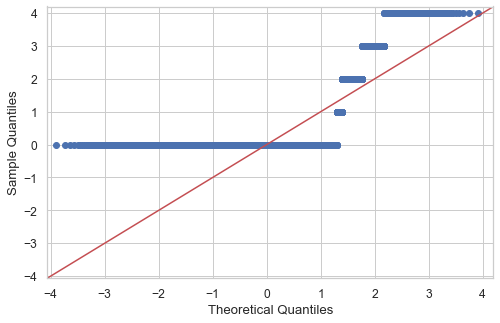

condition


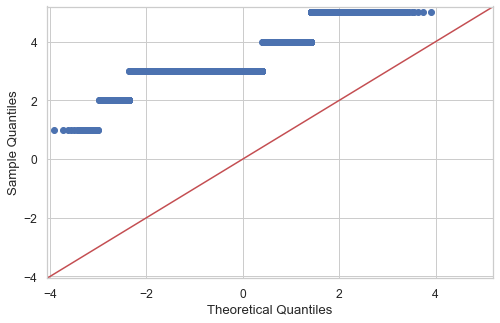

grade


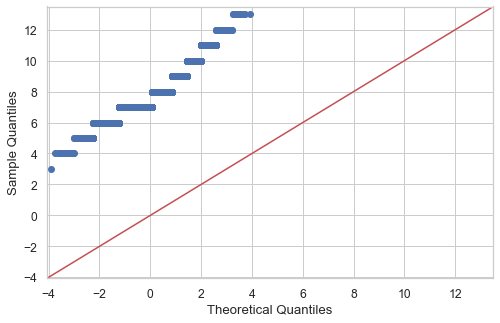

sqft_above


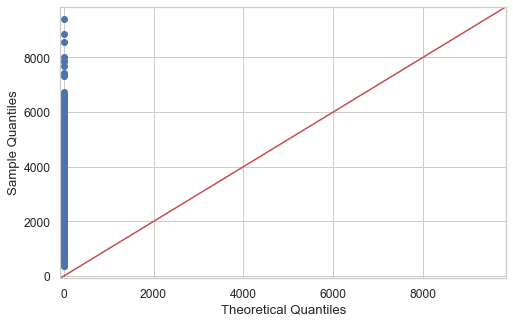

sqft_basement


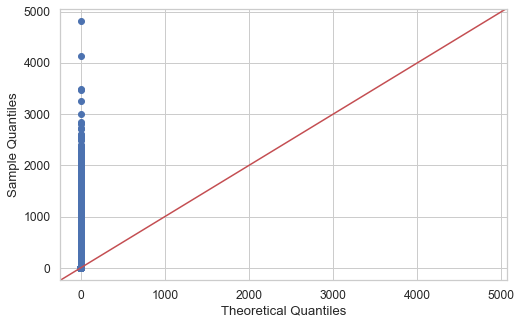

yr_built


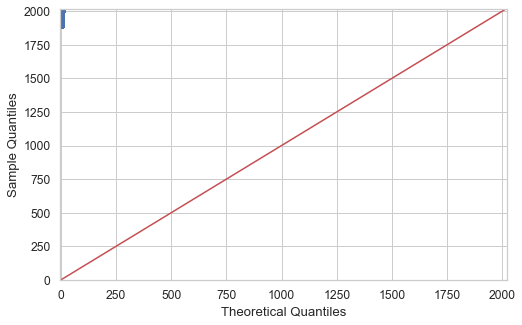

yr_renovated


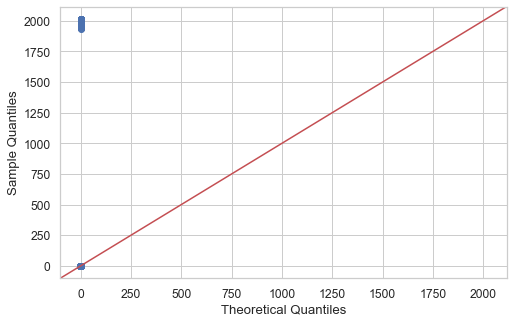

zipcode


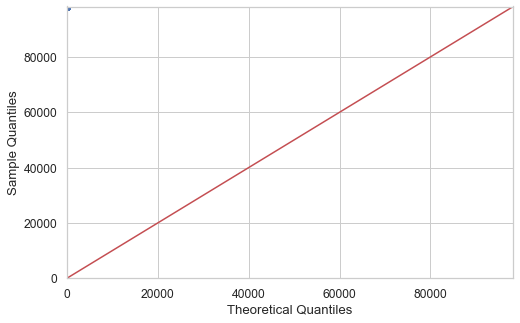

sqft_living15


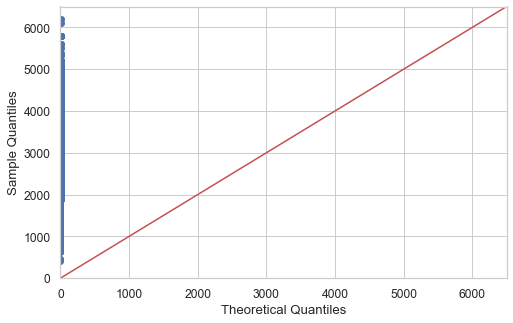

sqft_lot15


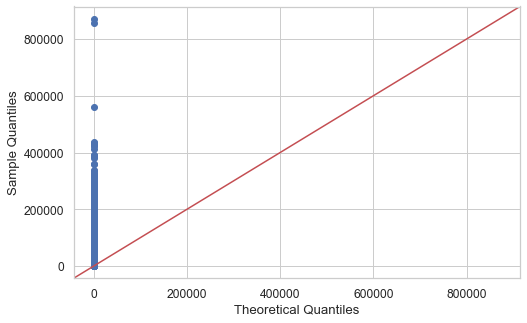

home_age


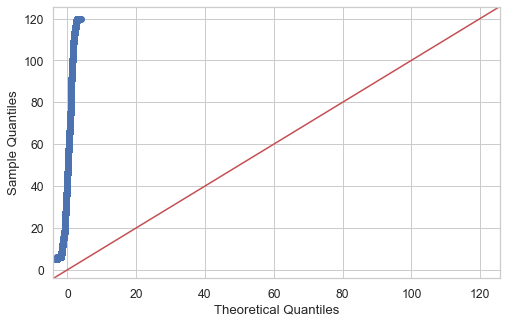

In [117]:
# Now, to do QQ plots for the dataset.

import statsmodels.api as sm
import pylab as py

for col in house_data.columns:
    
    if col != 'price':
        
        sm.qqplot(house_data[col], line ='45')
        print(col)
        py.show()

Note Stop:
--

At the moment, unless I'm missing something, there isn't any variable whose resideuals pass the normal distribution test. Perhaps transforming the data will improve this? Let's try doing some log transformations.

In [125]:
non_normal_variables = [i for i in house_data.columns if i != 'price' and i != 'grade']
non_normal_variables

house_data[non_normal_variables[3]] = house_data[non_normal_variables[3]].map(lambda x: np.log(x))

non_normal_variables
house_data

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,times_viewed,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,home_age
0,221900.0,0.094048,0.000000,7.073270,NaN,0.000000,-inf,-inf,1.098612,7,7.073270,-inf,7.578145,-inf,11.494537,7.200425,8.639411,4.174387
1,538000.0,0.094048,0.810930,7.851661,NaN,0.693147,-inf,-inf,1.098612,7,7.682482,5.991465,7.576097,7.596392,11.493997,7.432484,8.941022,4.234107
2,180000.0,-0.366513,0.000000,6.646391,NaN,0.000000,-inf,-inf,1.098612,6,6.646391,-inf,7.566828,-inf,11.493008,7.908387,8.994917,4.465908
3,604000.0,0.326634,1.098612,7.580700,NaN,0.000000,-inf,-inf,1.609438,7,6.956545,6.813445,7.583248,-inf,11.494110,7.215240,8.517193,4.007333
4,510000.0,0.094048,0.693147,7.426549,NaN,0.000000,-inf,-inf,1.098612,8,7.426549,-inf,7.594381,-inf,11.493478,7.495542,8.923058,3.496508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,0.094048,0.916291,7.333023,NaN,1.098612,-inf,-inf,1.098612,8,7.333023,-inf,7.605392,-inf,11.493773,7.333023,7.319202,2.397895
21593,400000.0,0.326634,0.916291,7.745003,NaN,0.693147,-inf,-inf,1.098612,8,7.745003,-inf,7.607878,-inf,11.494211,7.512071,8.881836,1.791759
21594,402101.0,-0.366513,-0.287682,6.927558,NaN,0.693147,-inf,-inf,1.098612,7,6.927558,-inf,7.605392,-inf,11.494191,6.927558,7.604396,2.397895
21595,400000.0,0.094048,0.916291,7.377759,NaN,0.693147,-inf,-inf,1.098612,8,7.377759,-inf,7.602900,-inf,11.492998,7.251345,7.160069,2.772589


In [99]:
# zips = pd.get_dummies(house_data.zipcode, prefix='zip')

In [104]:
# house_data.info()

In [295]:
for i in house_data:
    if 'zip' in i:
        house_data[i] = house_data[i].astype('str')
    elif 'waterfront' in i:
        house_data[i] = house_data[i].astype('float').astype('int')
    elif 'viewed' in i:
        house_data[i] = house_data[i].astype('float').astype('int')

house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,times_viewed,sqft_basement,yr_renovated,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,400,1991.0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,910,0.0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,0,0.0,...,1,0,0,0,0,0,0,0,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
siftr('times_viewed')

[0, 1, 2, 3, 4]


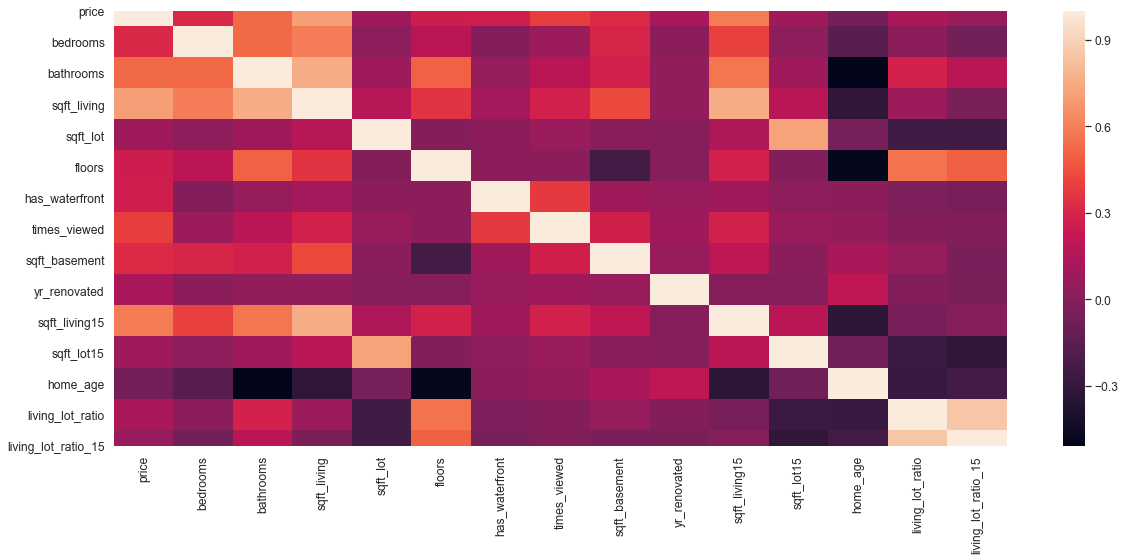

In [296]:
#checking on the correlation of the variables with a correlation matrix, for a quick eye test
# Zipcode dummy variables are in string format just to make it easy to visualize corrleation amongst other variables.
        
f, ax = plt.subplots(figsize=(20, 8))
corr = house_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

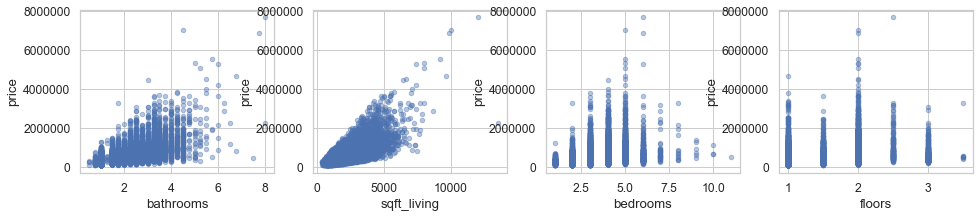

In [297]:
# Checking for whether any other variables need to be changed to categorical

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bathrooms', 'sqft_living', 'bedrooms', 'floors'], axes):
    house_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

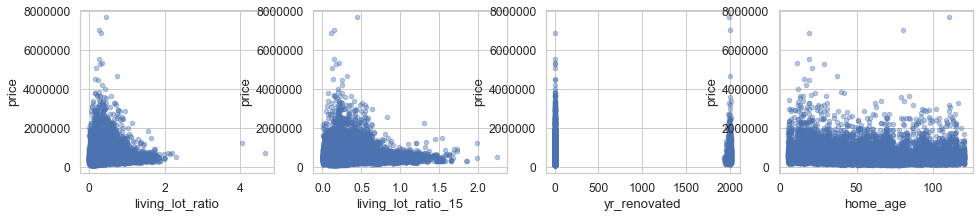

In [298]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['living_lot_ratio', 'living_lot_ratio_15', 'yr_renovated', 'home_age'], axes):
    house_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [310]:
# Creating dummy variables for select variables
floor_dummies = pd.get_dummies(house_data['floors'], drop_first=True, prefix='floors')

KeyError: 'floors'

In [303]:
pd.get_dummies(house_data['bedrooms'], drop_first=True, prefix='beds')

,beds_2,beds_3,beds_4,beds_5,beds_6,beds_7,beds_8,beds_9,beds_10,beds_11
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21592,0,1,0,0,0,0,0,0,0,0
21593,0,0,1,0,0,0,0,0,0,0
21594,1,0,0,0,0,0,0,0,0,0
21595,0,1,0,0,0,0,0,0,0,0


In [305]:
pd.get_dummies(house_data['yr_renovated'], drop_first=True, prefix='reno_done')

,reno_done_1934.0,reno_done_1940.0,reno_done_1944.0,reno_done_1945.0,reno_done_1946.0,reno_done_1948.0,reno_done_1950.0,reno_done_1951.0,reno_done_1953.0,reno_done_1954.0,...,reno_done_2006.0,reno_done_2007.0,reno_done_2008.0,reno_done_2009.0,reno_done_2010.0,reno_done_2011.0,reno_done_2012.0,reno_done_2013.0,reno_done_2014.0,reno_done_2015.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
pd.get_dummies(house_data['has_waterfront'], drop_first=True, prefix='waterfront')

,waterfront_1
0,0
1,0
2,0
3,0
4,0
...,...
21592,0
21593,0
21594,0
21595,0


In [308]:
pd.get_dummies(house_data['times_viewed'], drop_first=True, prefix='viewed')

,viewed_1,viewed_2,viewed_3,viewed_4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
21592,0,0,0,0
21593,0,0,0,0
21594,0,0,0,0
21595,0,0,0,0


In [1]:
#house_data = house_data.drop(['floors','yr_renovated','bedrooms','has_waterfront','times_viewed'], axis=1)